## Stroke Risk Prediction

In [ ]:
# Uncomment if you need to install packages:
# %pip install -r requirements.txt




[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [181]:
# Imports and initialization

# Standard library
import warnings
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML


# Scikit-learn: preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Scikit-learn: feature selection
from sklearn.feature_selection import mutual_info_classif

# Scikit-learn: model selection
from sklearn.model_selection import train_test_split

# Scikit-learn: clustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

# Scikit-learn: metrics
from sklearn.metrics import (
    silhouette_score,
    adjusted_rand_score,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    roc_auc_score,
    accuracy_score,
    f1_score,
    balanced_accuracy_score,
    confusion_matrix,
)

# Scikit-learn: regressors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Scikit-learn: classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier,
)
from sklearn.linear_model import LogisticRegression

# External ML libraries
from catboost import CatBoostClassifier
from xgboost import XGBClassifier



# Scipy
from scipy.optimize import linear_sum_assignment

# Visualization settings
sns.set_context("talk")
sns.set_style("whitegrid")



In [182]:
# Load Dataset
df = pd.read_csv("strokeX.csv")
display(HTML("<h3>📊 Dataset Overview</h3>"))
# Display patient numbers
display(HTML(f"<h4>Number of unique patients: {df.shape[0]} (1 record per patient assumed)</h4>"))

display(df.head())

# Store the original columns
original_columns = df.columns.tolist()

display(HTML(f"<h4>Shape: {df.shape[0]:,} rows × {df.shape[1]} columns</h4>"))

display(HTML("<h3>Sample Records</h3>"))
display(df.head())

# Display basic descriptive stats
display(HTML("<h4>Descriptive Statistics</h4>"))
df.describe(include='all').T

,age,gender,chest_pain,high_bp,irregular_heartbeat,short_breath,fatigue,dizziness,swelling,neckjaw_pain,excess_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_extremities,sleep_apnea,anxiety,stroke_risk_pct,at_risk
0,21,Male,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,18.5,0
1,32,Female,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,55.7,1
2,21,Male,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,23.0,0
3,51,Male,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,100.0,1
4,60,Female,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,100.0,1


,age,gender,chest_pain,high_bp,irregular_heartbeat,short_breath,fatigue,dizziness,swelling,neckjaw_pain,excess_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_extremities,sleep_apnea,anxiety,stroke_risk_pct,at_risk
0,21,Male,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,18.5,0
1,32,Female,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,55.7,1
2,21,Male,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,23.0,0
3,51,Male,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,100.0,1
4,60,Female,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,100.0,1


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,14976.0,NaN,NaN,NaN,43.178218,11.869719,18.0,34.0,42.0,52.0,86.0
gender,14976,2,Female,7507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chest_pain,14976.0,NaN,NaN,NaN,0.216747,0.412042,0.0,0.0,0.0,0.0,1.0
high_bp,14976.0,NaN,NaN,NaN,0.345219,0.475456,0.0,0.0,0.0,1.0,1.0
irregular_heartbeat,14976.0,NaN,NaN,NaN,0.158053,0.364803,0.0,0.0,0.0,0.0,1.0
short_breath,14976.0,NaN,NaN,NaN,0.266827,0.442316,0.0,0.0,0.0,1.0,1.0
fatigue,14976.0,NaN,NaN,NaN,0.321448,0.467048,0.0,0.0,0.0,1.0,1.0
dizziness,14976.0,NaN,NaN,NaN,0.266894,0.442351,0.0,0.0,0.0,1.0,1.0
swelling,14976.0,NaN,NaN,NaN,0.218283,0.413094,0.0,0.0,0.0,0.0,1.0
neckjaw_pain,14976.0,NaN,NaN,NaN,0.162193,0.36864,0.0,0.0,0.0,0.0,1.0


### Part 1 - Exploratory Feature Analysis & Risk Engineering

In [183]:
# Initialization
## Columns which correspond to symptoms like 'irregular_heartbeat'
SYMPTOM_COL_INDICES = df.columns[2:17]


#### 1.1 Age-Normalized Risk Index (ANRI)

The **Age-Normalized Risk Index (ANRI)** identifies patients whose stroke risk is unusually high for their age.  
A higher ANRI indicates a higher stroke risk relative to age. In this section, the ANRI is plotted using a histogram, and top 10 patients are displayed

*Note: ANRI is calculated by dividing each patient’s `stroke_risk_pct` by their `age`.*  
*Note: This assumes stroke risk scales linearly with age. Clinically, however - stroke risk actually increases exponentially with age*

,age,gender,chest_pain,high_bp,irregular_heartbeat,short_breath,fatigue,dizziness,swelling,neckjaw_pain,excess_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_extremities,sleep_apnea,anxiety,stroke_risk_pct,at_risk,ANRI
11337,31,Male,0,0,1,1,1,1,1,1,0,0,0,1,1,0,0,100.0,1,3.225806
589,31,Female,0,1,1,1,0,1,1,0,0,0,0,1,0,1,1,100.0,1,3.225806
3749,31,Male,0,1,0,1,1,1,0,1,1,0,0,1,1,1,0,100.0,1,3.225806
14739,21,Female,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,67.5,1,3.214286
360,30,Male,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,92.1,1,3.070000
9612,31,Male,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,92.8,1,2.993548
1053,34,Female,1,1,0,1,0,0,0,1,0,1,0,1,1,0,0,100.0,1,2.941176
7975,34,Female,1,1,0,1,1,1,0,0,1,0,1,0,0,1,0,100.0,1,2.941176
5828,31,Female,0,1,1,1,0,0,1,0,0,0,1,0,1,1,0,90.7,1,2.925806
11778,31,Female,1,1,0,0,0,0,1,1,0,1,0,0,0,1,1,90.7,1,2.925806


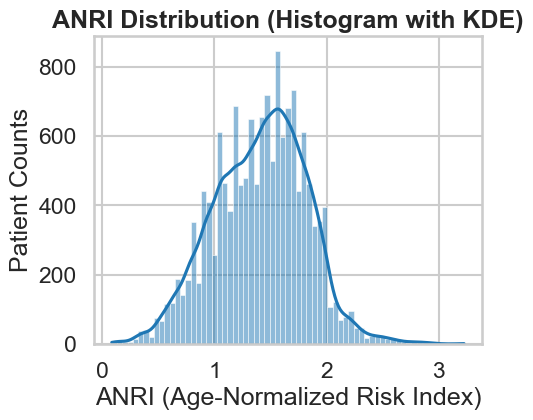

In [184]:
def compute_anri(df):
    """
    Compute and visualize the Age-Normalized Risk Index (ANRI)
    """

    # Add a new column for ANRI, inf values resulting from 0's are set to 0
    df['ANRI'] = df['stroke_risk_pct'].divide(df['age'])
    
    # Plot histogram
    plt.figure(figsize=(5, 4))
    sns.histplot(df['ANRI'], kde=True)
    plt.title('ANRI Distribution (Histogram with KDE)', fontweight='bold')
    plt.xlabel('ANRI (Age-Normalized Risk Index)')
    plt.ylabel('Patient Counts')
    
    display(HTML("<h3>Top 10 Patients by ANRI</h3>"))
    top_10_anri = df.sort_values(by='ANRI', ascending=False).head(10)
    display(top_10_anri)
    
    return df

df = compute_anri(df)


**Key Insight:** ANRI identifies young adults (21-34) with unusually high stroke risk—these patients have 8+ concurrent symptoms, making them clinical outliers worth flagging for early intervention.

#### 1.2 Chronic Condition Score (CCS)

The **Chronic Condition Score (CCS)** represents the number of chronic cardiovascular conditions a patient has, specifically high blood pressure and irregular heartbeat.  A higher CCS indicates greater chronic disease burden.

In this section, a new column CCS(0, 1, 2) is added. Also, the average stroke risk percentage for each CCS level is added. This is visualized on a bar plot.

*Note: CCS is the sum of the binary columns `high_bp` and `irregular_heartbeat`.*

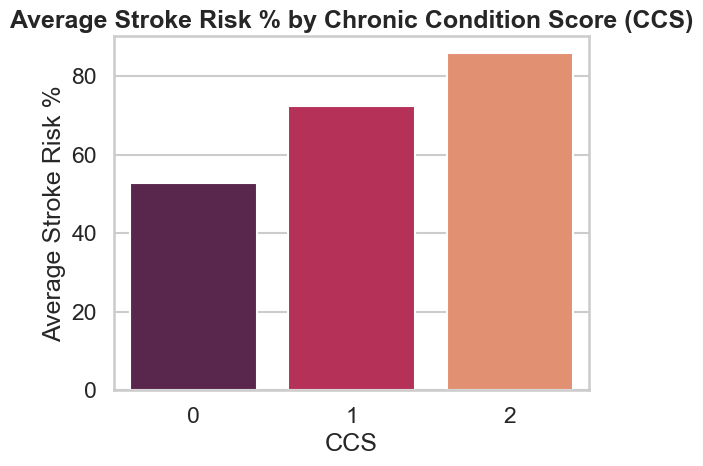

In [185]:
def compute_ccs(df):
    """
    Compute and visualize the Chronic Condition Score (CCS)
    """
    
    # Add a new column for CCS which is a sum of 2 risk factors
    df['CCS'] = df['high_bp'] + df['irregular_heartbeat']
    
    # Calculate mean values of stroke_risk_pct, for each CCS level. 
    # Adds it to the dataframe
    df['avg_stroke_risk_ccs_pct'] = df['CCS'].map(df.groupby('CCS')['stroke_risk_pct'].mean())

    # Create plot
    plt.figure(figsize=(6, 5))
    sns.barplot(x='CCS', y='avg_stroke_risk_ccs_pct', data=df, palette='rocket')
    plt.title('Average Stroke Risk % by Chronic Condition Score (CCS)', fontweight='bold')
    plt.xlabel('CCS')
    plt.ylabel('Average Stroke Risk %')
    plt.tight_layout()

    # summary data
    ccs_risk_summary = df.groupby('CCS')['stroke_risk_pct'].mean().reset_index()
    ccs_risk_summary.columns = ['CCS', 'avg_stroke_risk_ccs_pct']
    return ccs_risk_summary
    

ccs_summary = compute_ccs(df)

**Key Insight:** 
Stroke risk is positively correlated with the Chronic Condition Score (CCS), increasing by about 60% when the score rises from zero to two.

#### 1.3 Symptom Burden Index (SBI)

The **Symptom Burden Index (SBI)** quantifies the total number of symptoms reported by each patient.  
A higher SBI indicates a greater overall symptom load, which is expected to relate to higher stroke risk.

In this, the total `SBI` for each patient is computed using all symptom columns. Patients are categorized  into three groups based on SBI - *Low (0–3)*; *Moderate (4–6)*; *High (7+)

*Note: SBI is the sum of all symptom indicator columns (values 0 or 1).*

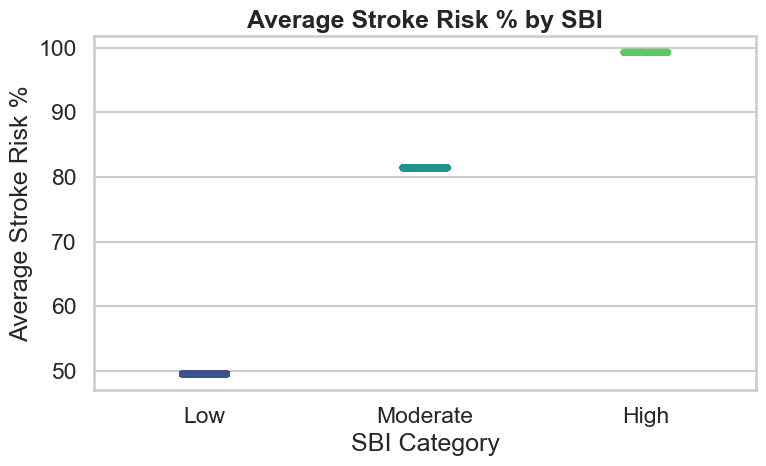

,sbi_cat,avg_stroke_risk_sbi_pct
0,Low,49.485728
1,Moderate,81.423182
2,High,99.275068


In [186]:
def compute_sbi(df):
    """
    Compute the Symptom Burden Index (SBI)
    """
    
    # Compute SBI = sum of all symptom columns
    # Columns from  'chest_pain' through 'anxiety' 
    df['SBI'] = df.iloc[:, 2:17].sum(axis=1)
    
    # categorize SBI into Low (0–3), Moderate (4–6), High (7+)
    df['sbi_cat'] = np.where(
        df['SBI'] <= 3, 'Low',
        np.where(df['SBI'] <= 6, 'Moderate', 'High')
    )
    
    # average stroke_risk_pct for each SBI category
    avg_risk_by_cat = df.groupby('sbi_cat')['stroke_risk_pct'].mean()
    avg_risk_by_cat = avg_risk_by_cat.reindex(['Low', 'Moderate', 'High'])
    df['avg_stroke_risk_sbi_pct'] = df['sbi_cat'].map(avg_risk_by_cat)
    
    # compute correlation between SBI and stroke_risk_pct
    corr = df['SBI'].corr(df['stroke_risk_pct'])
    display(HTML(f"<h3>SBI ↔ Stroke Risk (Correlation between SBI and stroke_risk_pct): {corr:.3f}</h3>"))

    
    # Strip plot showing average risk per category
    plt.figure(figsize=(8, 5))
    sns.stripplot(
        x='sbi_cat', 
        y='avg_stroke_risk_sbi_pct', 
        data=df, 
        order=['Low', 'Moderate', 'High'],
        palette='viridis'
    )
    plt.title('Average Stroke Risk % by SBI', fontweight='bold')
    plt.xlabel('SBI Category')
    plt.ylabel('Average Stroke Risk %')
    plt.tight_layout()
    plt.show()
    
    # summary table
    sbi_summary = avg_risk_by_cat.reset_index()
    sbi_summary.columns = ['sbi_cat', 'avg_stroke_risk_sbi_pct']
    
    # Display summary results
    display(HTML("<h3>SBI Summary</h3>"))
    display(sbi_summary)
  

    
    return sbi_summary
sbi_summary = compute_sbi(df)

**Key Insight:**   
The distribution of SBI across risk is:

Low SBI (0-3 symptoms) - Moderate risk at 49.5%
Moderate SBI (4-6 symptoms) - High risk at 81.4%
High SBI (7+ symptoms) - Extremely high risk at 99.3%

SBI shows a strong positive correlation (r=0.68) with stroke risk. Patients with 7+ symptoms have near-certain risk (99.3%), suggesting a clinical threshold where intervention becomes critical.

#### 1.4 Symptom Predictive Power using Mutual Information (MI)

**Mutual Information (MI)** measures how informative a feature is for predicting a target variable.  
Here, it shows how strongly each symptom relates to the stroke risk label (`at_risk`).


In [187]:
def compute_mi(df):
    """
    Compute the Mutual Information (MI) score
    """
    from sklearn.feature_selection import mutual_info_classif

    X = df[SYMPTOM_COL_INDICES]
    y = df['at_risk']

    # Compute Mutual Information
    mi_scores = mutual_info_classif(X, y, discrete_features=True, random_state=42)
    mi_series = pd.Series(mi_scores, index=SYMPTOM_COL_INDICES).sort_values(ascending=False)

    # Top 10
    top_10 = mi_series.head(10)

    display(HTML("<h3>Top 10 Most Predictive Symptoms for predicting At_Risk</h3>"))
    top_rounded = top_10.round(4).to_frame(name="MI Score")
    display(top_rounded)
    
    return top_rounded

mi_summary = compute_mi(df)

,MI Score
high_bp,0.0539
chest_pain,0.0267
sleep_apnea,0.0199
short_breath,0.0171
chest_discomfort,0.0159
irregular_heartbeat,0.0132
fatigue,0.0087
cold_extremities,0.0066
dizziness,0.0062
swelling,0.0053


**Key Insight**   
The biggest contributors to at_risk for stroke are high_bp, chest_pain and sleep_apnea





#### 1.5 Age-Adjusted Risk Z-Scores (AARZ)

The **Age-Adjusted Risk Z-Score (AARZ)** compares a patient’s stroke risk to others in the same age group.  
It highlights patients whose risk levels are unusually high or low relative to their peers. 10-year age bins are created. With each group Z-scores are computed.

*Note: For each 10-year age group, use how many standard deviations a patient’s stroke risk percentage is above or below the group’s mean value.*

In [188]:
def compute_aarz(df):
    """
    Compute Age-Adjusted Risk Z-Scores (AARZ)
    """
    df = df.copy()

    # Define bin edges and labels for 10-year age groups
    bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 120]
    labels = ['0-9', '10-19', '20-29', '30-39', '40-49', 
              '50-59', '60-69', '70-79', '80-89', '90-119']

    # Bin the 'age' column and create the new 'age_group' column
    # 'right=False' ensures the bins are inclusive of the left edge and exclusive of the right edge.
    df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False, include_lowest=True)
    
    # The Z-score is (patient_stroke_risk_pct - group_mean) / group_std_dev
    z_scores = df.groupby('age_group')['stroke_risk_pct'].transform(
        lambda x: (x - x.mean()) / x.std()
    )
    
    # handle division by 0
    z_scores = z_scores.fillna(0.0)
    df['risk_z_score'] = z_scores.round(4)
    
    # sort by z-score
    df_sorted = df.sort_values(by='risk_z_score', ascending=False)

    # top 5 by zscore
    top5_outliers = df_sorted.head(5)[['age', 'stroke_risk_pct', 'risk_z_score']]
    top5_outliers = top5_outliers.reset_index(drop=True)
    display(HTML("<h3>Top 5 by Z-Score</h3>"))
    display(top5_outliers)
    
    # top 2 per group — exactly 2, with age_group
    top_2_per_group = (
        df.sort_values(['age_group', 'risk_z_score'], ascending=[True, False])
          .groupby('age_group')
          .head(2)[['age', 'age_group', 'stroke_risk_pct', 'risk_z_score']]
          .reset_index(drop=True)
    )
    display(HTML("<h3>Top 2 within each age group</h3>"))
    display(top_2_per_group)
  
    return top5_outliers, top_2_per_group
    
    
top5_outliers, top_2_per_group = compute_aarz(df)

,age,stroke_risk_pct,risk_z_score
0,26,74.8,4.2178
1,26,68.2,3.6220
2,21,67.5,3.5588
3,27,67.1,3.5227
4,29,66.5,3.4686


,age,age_group,stroke_risk_pct,risk_z_score
0,19,10-19,51.6,2.5866
1,19,10-19,46.6,2.1537
2,26,20-29,74.8,4.2178
3,26,20-29,68.2,3.6220
4,31,30-39,100.0,3.2550
5,34,30-39,100.0,3.2550
6,45,40-49,100.0,2.2718
7,45,40-49,100.0,2.2718
8,51,50-59,100.0,0.7904
9,58,50-59,100.0,0.7904


**Key Insight**:  
Top 5 AARZ outliers are disproportionately young. This occurs because younger age bins contain very few patients,
resulting in low standard deviation.

#### 1.6 Risk Consistency Index (RCI)

The **Risk Consistency Index (RCI)** measures how well the continuous stroke risk scores align with the binary label `at_risk`.  
It captures how distinctly the two groups: *at risk* and *not at risk*, differ in their average stroke risk percentage. Higher RCI values indicate stronger consistency between risk scores and the `at_risk` label.

*Note*: RCI is calculated by taking the absolute difference between the group means and dividing it by the pooled standard deviation.  


In [189]:
def compute_rci(df):
    """
    Compute the Risk Consistency Index (RCI) 
    """
    # split up data by at_risk groups
    group0 = df[df['at_risk'] == 0]['stroke_risk_pct']
    group1 = df[df['at_risk'] == 1]['stroke_risk_pct']
    
    
    # get stats for each group
    mean0, mean1 =  group0.mean(), group1.mean()
    std0, std1 =  group0.std(ddof=1), group1.std(ddof=1)
    n1, n0 = len(group1), len(group0)
    
    # print mean, standard deviation
    display(HTML(f"<h4>For group at_risk=0: mean={mean0:.3f}, std={std0:.3f}</h4>"))
    display(HTML(f"<h4>For group at_risk=1: mean={mean1:.3f}, std={std1:.3f}</h4>"))

    
    # Pooled standard deviation
    pooled_std = np.sqrt(
        ((n1 - 1) * std1**2 + (n0 - 1) * std0**2) / (n1 + n0 - 2)
    )
    
    rci = abs(mean1 - mean0) / pooled_std
    display(HTML(f"<h4>Risk Consistency Index (RCI): {rci:.3f}</h4>"))
    

RCI = compute_rci(df)

**Key Insight**  
Comparing stats across the at_risk groups:   
  
**Mean values**    
For group `at_risk`=`0`, `stroke_risk_pct` mean = `34.854`.  
For group `at_risk`=`1`, `stroke_risk_pct` mean = `79.364`.    
On the basis of mean `stroke_risk_pct`, there is strong correlation between `at_risk` status grouping and `stroke_risk_pct` values.

**RCI**   
For a more significant metric, look at the RCI value. The RCI value indicates that the mean `stroke_risk_pct` for the `at_risk` = 1 group is `2.87` pooled standard deviations higher than the mean `stroke_risk_pct` for the `at_risk` = 0 group.

So there is a huge difference in stroke risk between the two `at_risk` groups. Which indicates that the groups are well separated, and that the binary grouping is consistent with the continuous variable `stroke_risk_pct`.


#### 1.7 Composite Health Risk Index (CHRI)

The **Composite Health Risk Index (CHRI)** combines multiple cardiovascular indicators into a single, weighted risk score. It integrates *high blood pressure*, *irregular heartbeat*, and *age-normalized risk (ANRI)* to capture an individual’s overall health vulnerability.  

In this section, the **Composite Health Risk Index (CHRI)** is calculated for each patient. **Top 5 patients** with the highest CHRI values are identified     

*Note:* CHRI is computed using the weighted formula:  *CHRI = 0.4 * High Blood Pressure + 0.4 * Irregular Heartbeat + 0.2 * ANRI*


In [190]:
def compute_chri(df):
    """
    Compute the Composite Health Risk Index (CHRI) 
    """
    df['CHRI'] = 0.4 * df['high_bp'] + 0.4 * df['irregular_heartbeat'] + 0.2 * df['ANRI']
    top_chri = df.sort_values(by='CHRI', ascending=False).head(5)
    corr_chri_label = df['CHRI'].corr(df['stroke_risk_pct'])
    corr_chri_risk = df['CHRI'].corr(df['at_risk'])
    
    display(HTML("<h3>Top 5 CHRI Entries</h3>"))
    display(top_chri[['at_risk','stroke_risk_pct','CHRI']])
    
    display(HTML(f"<h4>Correlation for CHRI vs stroke_risk_pct: {corr_chri_risk:.4f}</h4>"))
    display(HTML(f"<h4>Correlation for CHRI vs at_risk: {corr_chri_label:.4f}</h4>"))
    
    return df, top_chri, corr_chri_risk, corr_chri_label

df, top_chri, corr_chri_risk, corr_chri_label = compute_chri(df)

,at_risk,stroke_risk_pct,CHRI
589,1,100.0,1.445161
5828,1,90.7,1.385161
43,1,95.9,1.381212
2879,1,88.3,1.369677
11279,1,89.6,1.360000


#### Key Insight

This indicates that correlation between CHRI and risk metrics is moderate.

#### 1.8 Risk Stratification Buckets

Patients are divided into *Low*, *Moderate*, and *High* risk groups based on their normalized stroke risk percentage.  This helps compare how *age*, *symptom burden (SBI)*, and *chronic conditions (CCS)* vary across different risk levels.

In this section
1. Patients are categorized into three buckets — *Low (0–0.3)*, *Moderate (0.3–0.7)*, *High (0.7–1.0)*. For each group, the average values for **age**, **SBI**, and **CCS** is computed.
2. These are visualized using a bar plot with a log scale on the y-axis 

*Note: `stroke_risk_pct` is normalized by dividing by 100, then assigning each patient to a risk category.*



,age,SBI,CCS
risk_category,,,
Low,29.3,1.7,0.1
Moderate,38.4,2.9,0.4
High,53.9,4.3,0.8


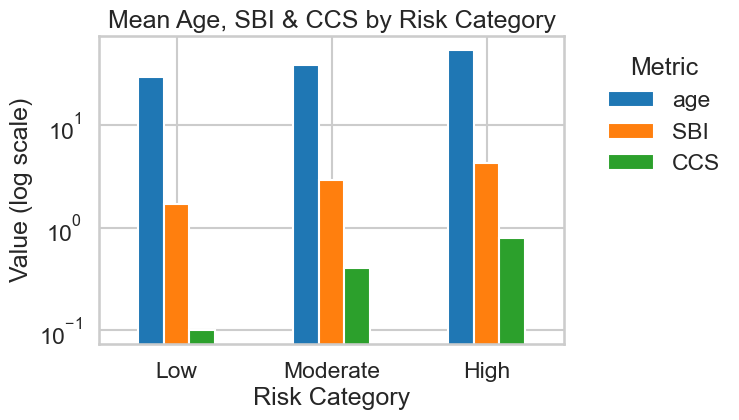

In [191]:
def compute_risk_buckets(df):
    """
    Create risk stratification buckets based on normalized stroke risk percentage
    """
    def categorize_risk(risk):
        if risk <= 0.3:
            return 'Low'
        elif risk <= 0.7:
            return 'Moderate'
        else:
            return 'High'
    
    # Normalize stroke_risk_pct and assign risk category
    df['norm_stroke_risk_pct'] = df['stroke_risk_pct'] / 100
    df['risk_category'] = df['norm_stroke_risk_pct'].apply(categorize_risk)
    
    # Compute means for age, SBI, and CCS (now included)
    means = df.groupby('risk_category')[['age', 'SBI', 'CCS']].mean().round(1)
    means = means.reindex(['Low', 'Moderate', 'High'])
    display(HTML("<h3>Mean values</h3>"))
    display(means)
    
    # Bar plot with log scale
    ax = means.plot(kind='bar', figsize=(6,4), logy=True,
                    title='Mean Age, SBI & CCS by Risk Category')
    ax.set_ylabel('Value (log scale)')
    ax.set_xlabel('Risk Category')
    ax.tick_params(axis='x', rotation=0)
    ax.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')  
    return means

bucket_summary = compute_risk_buckets(df)

**Key Insights**

| Risk Category | Mean Age | Mean SBI | Mean CCS | Insight |
| -------- | -------- | -------- | -------- | -------- |
| Low | 29.3 | 1.7 | 0.1 | Young with moderate Number of Symptoms, low number of chronic conditions, hence Low Risk |
| Moderate | 38.4 | 2.9 | 0.4 | Middle Age, emerging numbers of symptoms and chronic conditions, hence Moderate Risk |
| High | 53.9 | 4.3 | 0.8 | Older, many symptoms, more number of chronic conditions, hence High Risk |

As expected, younger patients have less symptoms, and less chronic conditions, and lower risks. These all increase with age.

In [192]:
# Document newly Created Columns
current_columns = df.columns.tolist()
new_columns = [col for col in current_columns if col not in original_columns]

print("Columns present in the final DataFrame:\n")
print(current_columns)

print("\n Newly created columns:")
if new_columns:
    print(new_columns)
else:
    print("No new columns were created")

Columns present in the final DataFrame:

['age', 'gender', 'chest_pain', 'high_bp', 'irregular_heartbeat', 'short_breath', 'fatigue', 'dizziness', 'swelling', 'neckjaw_pain', 'excess_sweating', 'persistent_cough', 'nausea_vomiting', 'chest_discomfort', 'cold_extremities', 'sleep_apnea', 'anxiety', 'stroke_risk_pct', 'at_risk', 'ANRI', 'CCS', 'avg_stroke_risk_ccs_pct', 'SBI', 'sbi_cat', 'avg_stroke_risk_sbi_pct', 'CHRI', 'norm_stroke_risk_pct', 'risk_category']

 Newly created columns:
['ANRI', 'CCS', 'avg_stroke_risk_ccs_pct', 'SBI', 'sbi_cat', 'avg_stroke_risk_sbi_pct', 'CHRI', 'norm_stroke_risk_pct', 'risk_category']


### Part 2 - Clustering: Patient Risk Profiles


#### 2.1 Feature Preparation for Clustering

Before applying clustering algorithms, it is important to prepare the dataset by selecting relevant continuous features and standardizing them.

**Implementation:**
1. Continuous features relevant to clustering are selected: `age`, `SBI`, `CCS`, `ANRI`, and `stroke_risk_pct`.  
2. The selected features are scaled using `StandardScaler` so that each has mean = 0 and standard deviation = 1.  
3. The shape of the scaled matrix and the first few transformed rows are displayed.

In [193]:
def prepare_clustering_features(df):
    """
    Select and standardize relevant continuous features for clustering.
    Returns the scaled feature matrix and its corresponding DataFrame.
    """
    # features we are interested in
    features = ['age', 'SBI', 'CCS', 'ANRI', 'stroke_risk_pct']
    X = df[features]
    
    # scale so that mean = 0 and std = 1
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    df[[f'{col}_scaled' for col in features]] = X_scaled
  

    # Shape of scaled feature matrix
    display(HTML(f"<h4>Shape of scaled feature matrix: {X_scaled.shape}</h4>"))
    
    display(HTML("<h4>First few transformed rows:</h4>"))
    display(pd.DataFrame(X_scaled, columns=features).head())
    
    return X_scaled, df
    
X_scaled, df = prepare_clustering_features(df)

,age,SBI,CCS,ANRI,stroke_risk_pct
0,-1.868533,-0.898873,0.821920,-1.277754,-1.642857
1,-0.941774,1.206134,0.821920,0.797177,-0.246071
2,-1.868533,-0.898873,-0.832747,-0.760548,-1.473891
3,0.658991,0.504465,-0.832747,1.328560,1.417306
4,1.417249,-0.197204,2.476587,0.618669,1.417306




#### 2.2 Optimal Number of Clusters (Elbow & Silhouette Methods)

To determine the appropriate number of clusters (**k**), two evaluation methods are used:

- **Elbow Method:** observes the point where inertia (within-cluster variance) stops decreasing sharply.  
- **Silhouette Score:** measures how well clusters are separated (higher = better).  

**Implementation:**
1. **K-Means** clustering is run for values of k = 2 to 10.  
2. **Inertia** and **Silhouette Score** are computed and stored for each k.  
3. Both metrics are visualized to identify the k that balances compactness and separation.  
4. The numeric summary table is displayed.

,k,Inertia,Silhouette Score
0,2,41729.36,0.3774
1,3,34468.08,0.2650
2,4,28875.08,0.2859
3,5,24815.04,0.2794
4,6,22129.93,0.2910
5,7,19871.73,0.2920
6,8,17856.93,0.2962
7,9,16554.47,0.2902


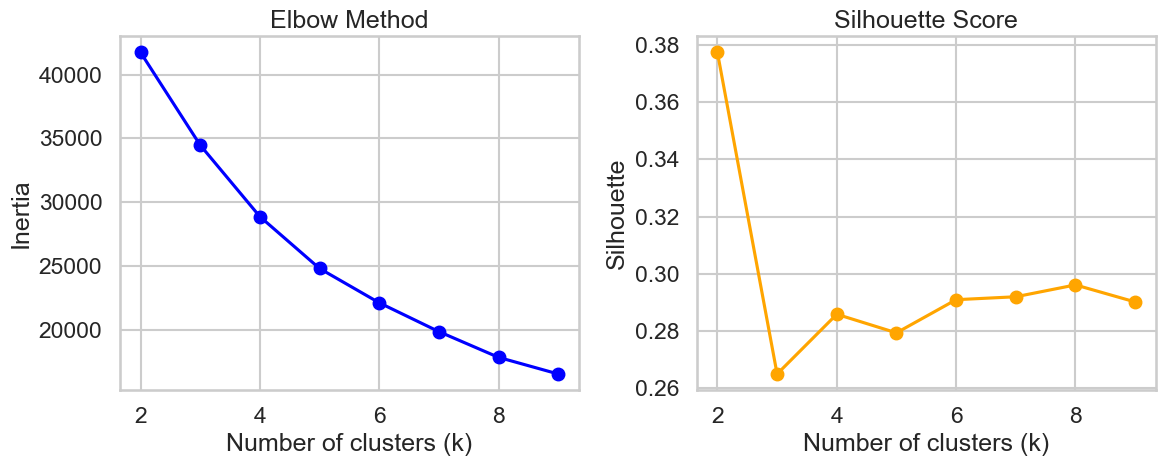

In [194]:
def evaluate_kmeans_clusters(X_scaled, k_min=2, k_max=10):
    """
    Evaluate optimal number of clusters (k) using Elbow and Silhouette methods.
    Computes inertia and silhouette scores for k in [k_min, k_max].
    """
    k_range = range(k_min, k_max)
    inertias        = []
    silhouette_vals = []

    for k in k_range:
        km = KMeans(n_clusters=k, random_state=42, n_init=10)
        km.fit(X_scaled)
        
        inertias.append(km.inertia_)
        sil = silhouette_score(X_scaled, km.labels_)
        silhouette_vals.append(sil)
        
    summary = pd.DataFrame({'k': list(k_range),'Inertia': np.round(inertias, 2),'Silhouette Score' : np.round(silhouette_vals, 4)})

    display(HTML("<h4>K-Means evaluation (k = 2 to 10)</h4>"))
    display(summary)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    ax1.plot(k_range, inertias, marker='o', color='blue')
    ax1.set_title('Elbow Method')
    ax1.set_xlabel('Number of clusters (k)')
    ax1.set_ylabel('Inertia')
    ax1.grid(True)

    # Silhouette
    ax2.plot(k_range, silhouette_vals, marker='o', color='orange')
    ax2.set_title('Silhouette Score')
    ax2.set_xlabel('Number of clusters (k)')
    ax2.set_ylabel('Silhouette')
    ax2.grid(True)

    plt.tight_layout()
    plt.show()
    return summary 

opt_df = evaluate_kmeans_clusters(X_scaled)

For the elbow method, the curve starts to flatten out between k=3 and k=5. For the silhouette score, the highest is at k=2, but decent around k=4-6. Considering both values, a good value is at k=4.


#### 2.3 K-Means Clustering and Visualization

Using the results from the previous analysis, an appropriate number of clusters (**k**, typically 3–5) is chosen.

**K-Means** partitions patients into groups such that individuals in the same cluster are more similar to each other based on selected numeric features, while those in different clusters are more dissimilar.

**Implementation:**
1. **K-Means** is fit on the standardized feature matrix (`X_scaled`) with the chosen value of **k**.  
2. The dataset is reduced to 2 dimensions using **PCA** for visualization.  
3. Cluster labels are assigned to each patient and mapped to descriptive names (e.g., *Low Risk*, *Moderate Risk*, *High Risk*).  
4. The clusters are plotted in 2D PCA space with cluster centroids highlighted.

I initially generated plots with k=4. But on casual inspection of the data and plots, the `stroke_risk_pct` had a better correlation with the clustering labels if k was set to be 3, so ended up choosing that.

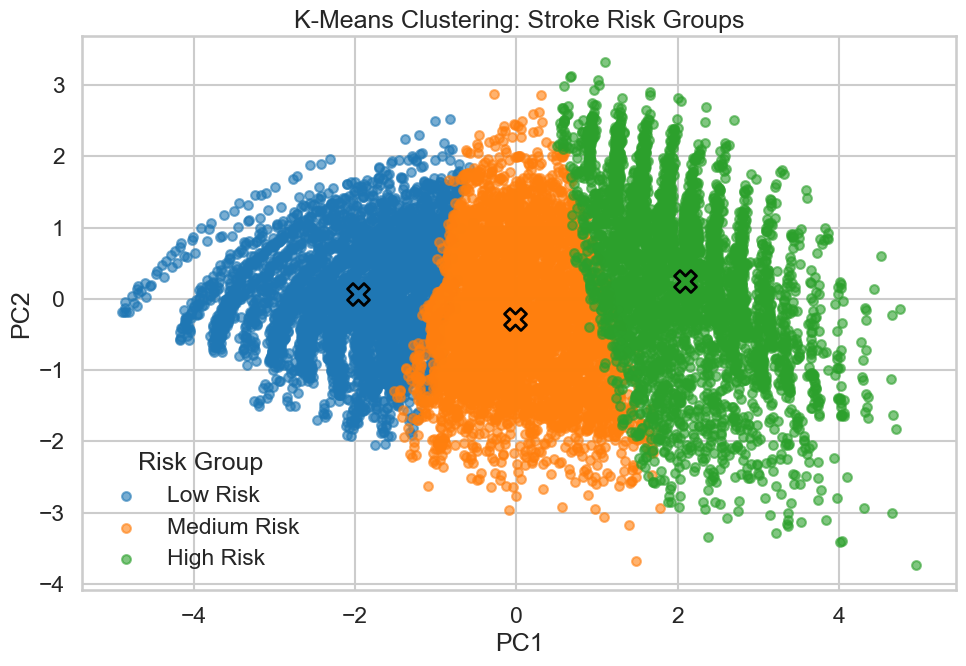

In [195]:
def perform_kmeans_clustering(df, X_scaled, k=3):
    """
    Fit K-Means clustering, project to 2D PCA space, and visualize clusters.
    Clusters are sorted by stroke risk and colored consistently using tab10.
    Returns DataFrame with cluster labels and centroids in PCA space.
    """
    
    # Fit K-Means
    km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_scaled)
    df['cluster'] = km.labels_

    # Reduce to 2D with PCA
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X_scaled)
    cent_pca = pca.transform(km.cluster_centers_)

    # Sort clusters by average stroke risk (low to high)
    cluster_risk = df.groupby('cluster')['stroke_risk_pct'].mean().sort_values()
    sorted_clusters = cluster_risk.index.tolist()

    # Assign human-readable risk names in order
    risk_names = ['Low Risk', 'Medium Risk', 'High Risk']
    cluster_to_risk_name = dict(zip(sorted_clusters, risk_names))
    df['risk_cluster'] = df['cluster'].map(cluster_to_risk_name)

    # Assign tab10 colors in the same risk order
    risk_ordered_colors = [plt.cm.tab10(i) for i in range(k)]

    # Plot
    plt.figure(figsize=(10, 7))
    jitter_strength = 0.03

    # Plot each cluster
    for i, cluster in enumerate(sorted_clusters):
        mask = df['cluster'] == cluster
        x = X_pca[mask, 0]
        y = X_pca[mask, 1]
        jx = np.random.normal(0, jitter_strength, len(x))
        jy = np.random.normal(0, jitter_strength, len(y))
        plt.scatter(x + jx, y + jy, s=40, alpha=0.6,
                    label=cluster_to_risk_name[cluster],
                    color=risk_ordered_colors[i])

    # Plot centroids in matched colors
    for i, cluster in enumerate(sorted_clusters):
        cx, cy = cent_pca[cluster]
        plt.scatter(cx, cy, marker='X', s=250,
                    edgecolor='black', linewidth=2,
                    color=risk_ordered_colors[i])

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('K-Means Clustering: Stroke Risk Groups')
    plt.legend(title='Risk Group')
    plt.tight_layout()
    plt.show()

    return df, cent_pca


df, centroids = perform_kmeans_clustering(df, X_scaled, k=3)



#### 2.4 Cluster Profiling and Interpretation

Once the clusters are formed, it is important to interpret what each group represents.  
This is done by computing the **average feature values** for key indicators such as  
`age`, `SBI`, `CCS`, `ANRI`, and `stroke_risk_pct`.

**Implementation:**
1. The mean values of these features are computed for each cluster.  
2. A summary table showing the average characteristics per cluster is created.  
3. Each cluster is interpreted (e.g., *young–low-risk*, *older–high-burden*).

,age,CHRI,SBI,CCS,ANRI,stroke_risk_pct
risk_cluster,,,,,,
Low Risk,35.41,0.25,2.04,0.13,0.96,33.94
Medium Risk,40.24,0.50,3.32,0.50,1.51,59.86
High Risk,54.82,0.71,4.55,0.89,1.77,95.02


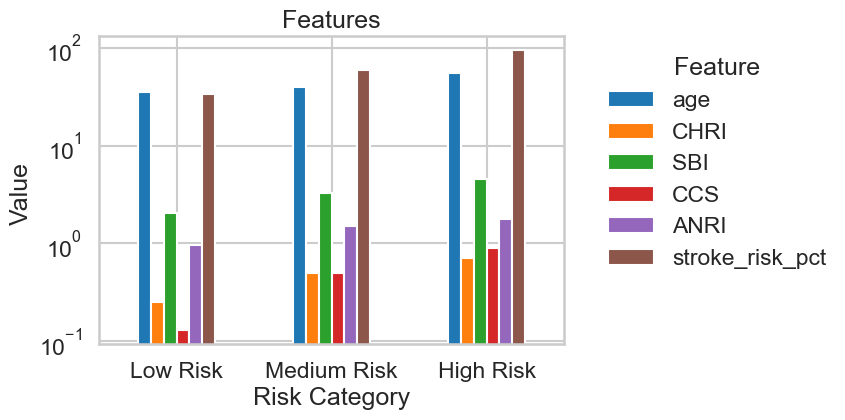

In [196]:
def cluster_profiling(df):
    """
    Summarize and display average feature values for each cluster.
    """
    # Compute mean of key features per cluster
    features=['age', 'CHRI','SBI', 'CCS', 'ANRI', 'stroke_risk_pct']
    profile = df.groupby('risk_cluster')[features].mean().round(2)

    profile = profile.reindex(['Low Risk', 'Medium Risk', 'High Risk'])
    display(HTML("<h3>Profiles</h3>"))
    display(profile)
    
    # Bar plot
    ax = profile.plot(kind='bar', figsize=(6,4), logy=True, title='Features')
    ax.set_ylabel('Value ')
    ax.set_xlabel('Risk Category')
    ax.tick_params(axis='x', rotation=0)

    ax.legend(title='Feature', bbox_to_anchor=(1.05, 1), loc='upper left')  
    
    return profile
    

cluster_profile = cluster_profiling(df)

**Key Insights**  
Clustering has correctly placed patients with increasing stroke_risk_pct into successive clusters of Low, Moderate, and High Risk.
This is true for the other metrics too.

Note it's a little hard to make out because the features are not scaled, and log values are used. I did play around with those, but did not have the time to do a proper interpretation to include it.



#### 2.5 Cluster Risk Comparison

To evaluate the clinical significance of each cluster, their overall stroke risk levels are compared.  
This helps determine whether certain clusters represent higher medical vulnerability.

**Implementation:**
1. For each cluster, the following are computed:  
   - Mean `stroke_risk_pct`  
   - Proportion of patients where `at_risk = 1`  
2. A summary table showing these statistics is created.  
3. Both metrics are visualized using side-by-side bar plots.

,mean_stroke_risk,at_risk_pct
risk_cluster,,
Low Risk,33.94,6.84
Medium Risk,59.86,78.39
High Risk,95.02,100.00


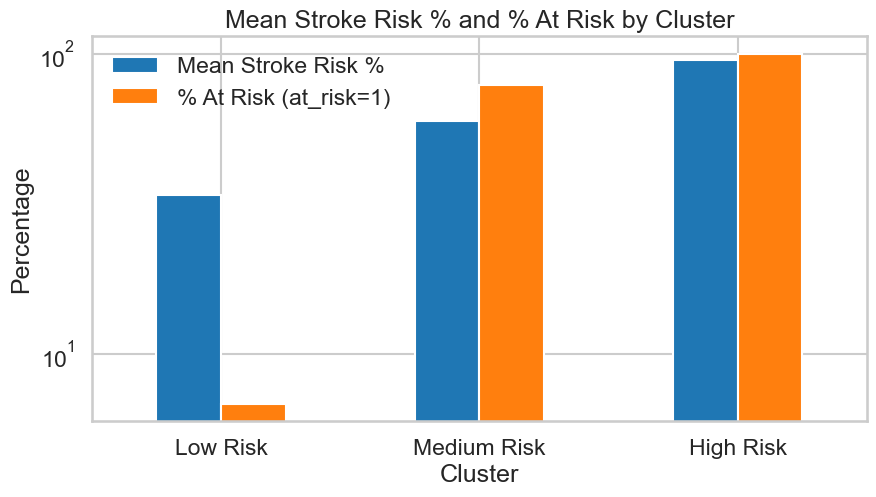

In [197]:
def cluster_risk_comparison(df):
    """
    Compare average stroke risk and at-risk proportion across clusters.
    """
    
    
    # Group by cluster and calculate stats
    cluster_risk = (
        df.groupby("risk_cluster")
        .agg(
            mean_stroke_risk=("stroke_risk_pct", "mean"),
            at_risk_pct=("at_risk", lambda s: (s == 1).mean() * 100),
        )
        .round(2)
    )
    cluster_risk = cluster_risk.reindex(['Low Risk', 'Medium Risk', 'High Risk'])

    # Print table
    display(HTML("<h3>Cluster Risks</h3>"))
    display(cluster_risk)

    # Plot side-by-side bars
    cluster_risk.plot(kind='bar', logy=True,figsize=(10, 5))
    plt.title('Mean Stroke Risk % and % At Risk by Cluster')
    plt.ylabel('Percentage')
    plt.xlabel('Cluster')
    plt.legend(['Mean Stroke Risk %', '% At Risk (at_risk=1)'])
    plt.xticks(rotation=0)
    plt.show()
    
    return cluster_risk


cluster_risk = cluster_risk_comparison(df)



#### 2.6 Gaussian Mixture Model (GMM) Comparison

While K-Means assigns each point to exactly one cluster, a **Gaussian Mixture Model (GMM)** allows *probabilistic* membership, capturing overlap between patient groups.

**Implementation:**
1. A GMM is fit with the same number of clusters (**k**) used in K-Means.  
2. GMM cluster labels are aligned with K-Means labels for consistency.  
3. The **Adjusted Rand Index (ARI)** is computed to quantify agreement between the two models.  
4. Both K-Means and GMM results are visualized side by side in PCA space.

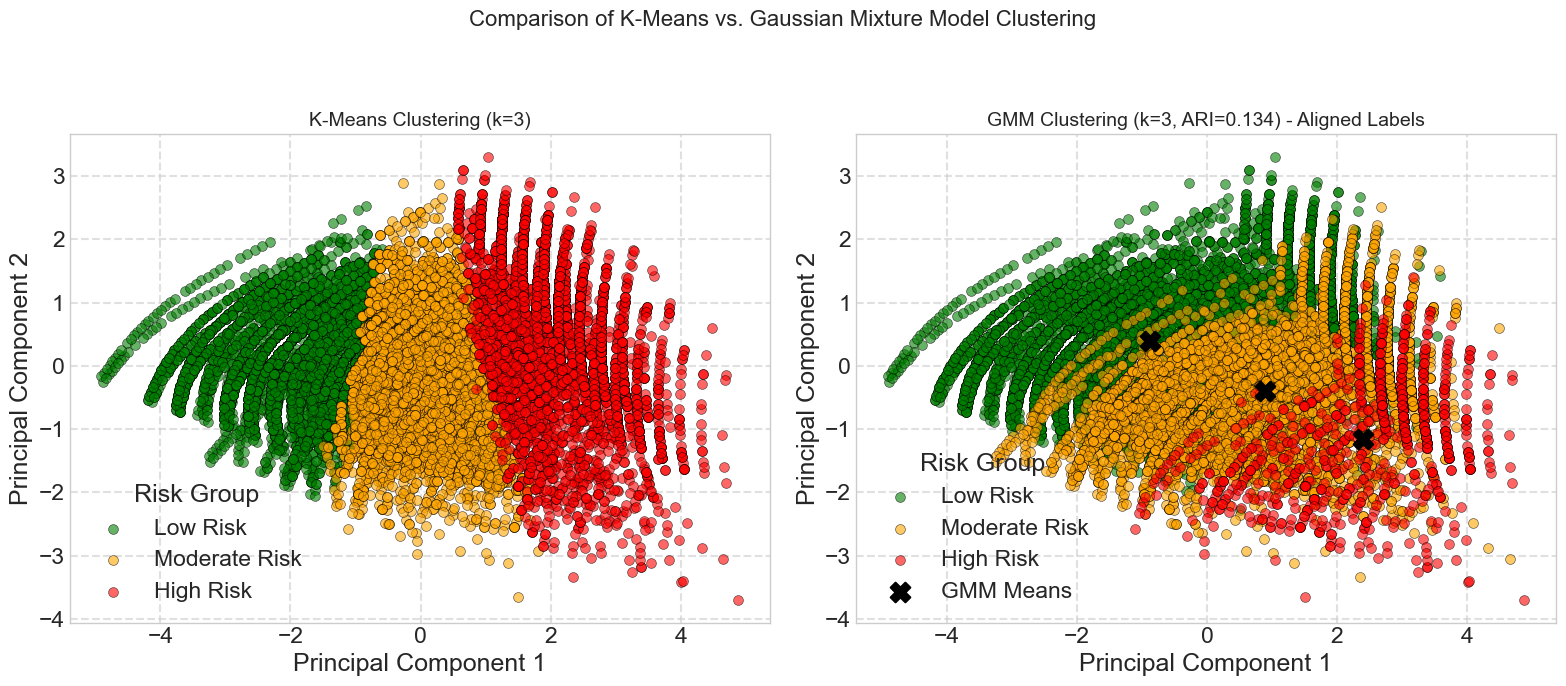

In [198]:
# --- Custom Function for Label Alignment (using the Hungarian algorithm) ---

def relabel_clusters_hungarian(true_labels, predicted_labels, k):
    """
    Relabels predicted cluster assignments (predicted_labels) to best match
    true labels (true_labels) using the Hungarian algorithm (linear_sum_assignment)
    to maximize cluster overlap.
    """
    # Map labels to non-negative integers for confusion matrix calculation
    # Note: LabelEncoder is used to ensure labels start from 0 and are contiguous
    le = LabelEncoder()
    le.fit(np.concatenate([true_labels, predicted_labels]))
    true_labels_int = le.transform(true_labels)
    predicted_labels_int = le.transform(predicted_labels)

    # Create confusion matrix
    # confusion[i, j] is the count of samples in true cluster i and predicted cluster j
    confusion = np.zeros((k, k))
    for i in range(len(true_labels)):
        t = true_labels_int[i]
        p = predicted_labels_int[i]
        if t < k and p < k:
            confusion[t, p] += 1

    # Find optimal alignment by minimizing the negative confusion matrix (maximizing overlap)
    row_ind, col_ind = linear_sum_assignment(-confusion)

    # Create mapping: predicted_label (col_ind) -> new_label (row_ind)
    gmm_to_aligned = {col_ind[i]: row_ind[i] for i in range(k)}

    # Apply the mapping
    gmm_labels_aligned = np.array([gmm_to_aligned[label] for label in predicted_labels_int])

    return gmm_labels_aligned



def compare_kmeans_gmm(df, X_scaled, k=3):
    """
    Compare K-Means and Gaussian Mixture Model (GMM) clustering.
    Computes Adjusted Rand Index (ARI) and visualizes both cluster assignments.
    """
    
    # k-means labels (The 'ground truth' for comparison)
    k_means_labels = df['cluster'].values


    # fit GMM and Predict Hard Cluster Membership
    gmm = GaussianMixture(n_components=k, random_state=42, covariance_type='full', n_init=10)
    gmm.fit(X_scaled)
    gmm_hard_labels = gmm.predict(X_scaled)

    # align GMM Labels with K-Means Labels
    gmm_aligned_labels = relabel_clusters_hungarian(k_means_labels, gmm_hard_labels, k)
    df['GMM_Cluster'] = gmm_aligned_labels
    df['KMeans_Cluster'] = k_means_labels

    # map clusters to risk names
    # determine the risk order based on the 'stroke_risk_pct' mean
    risk_means = df.groupby('KMeans_Cluster')['stroke_risk_pct'].mean().sort_values().index.tolist()

    # define risk names based on the sorted mean risk
    cluster_names = {risk_means[0]: 'Low Risk', risk_means[1]: 'Moderate Risk', risk_means[2]: 'High Risk'}

    df['KMeans_Cluster_Name'] = df['KMeans_Cluster'].map(cluster_names)
    df['GMM_Cluster_Name'] = df['GMM_Cluster'].map(cluster_names)

    # compute Adjusted Rand Index (ARI)
    ari_aligned = adjusted_rand_score(k_means_labels, gmm_aligned_labels)


    # PCA for Visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    df['PCA1'] = X_pca[:, 0]
    df['PCA2'] = X_pca[:, 1]

    # plots
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))

    # Define colors for k=3
    colors_map = {'Low Risk': 'green', 'Moderate Risk': 'orange', 'High Risk': 'red'}
    plot_names = ['Low Risk', 'Moderate Risk', 'High Risk']


    # Subplot 1: K-Means  
    for name in plot_names:
        color = colors_map.get(name, 'gray')
        mask = df['KMeans_Cluster_Name'] == name
        axes[0].scatter(df.loc[mask, 'PCA1'], df.loc[mask, 'PCA2'],
                        c=color, label=name, alpha=0.6, s=50, edgecolors='k', linewidths=0.5)

    axes[0].set_title(f"K-Means Clustering (k={k})", fontsize=14)
    axes[0].set_xlabel("Principal Component 1")
    axes[0].set_ylabel("Principal Component 2")
    axes[0].legend(title="Risk Group")
    axes[0].grid(True, linestyle='--', alpha=0.6)

    #  Subplot 2: GMM Results 
    for name in plot_names:
        color = colors_map.get(name, 'gray')
        mask = df['GMM_Cluster_Name'] == name
        axes[1].scatter(df.loc[mask, 'PCA1'], df.loc[mask, 'PCA2'],
                        c=color, label=name, alpha=0.6, s=50, edgecolors='k', linewidths=0.5)

    # plot GMM component means
    gmm_means_pca = pca.transform(gmm.means_)
    axes[1].scatter(gmm_means_pca[:, 0], gmm_means_pca[:, 1],
                    marker='X', s=200, color='black', label='GMM Means', zorder=5)

    axes[1].set_title(f"GMM Clustering (k={k}, ARI={ari_aligned:.3f}) - Aligned Labels", fontsize=14)
    axes[1].set_xlabel("Principal Component 1")
    axes[1].set_ylabel("Principal Component 2")
    axes[1].legend(title="Risk Group")
    axes[1].grid(True, linestyle='--', alpha=0.6)

    plt.suptitle("Comparison of K-Means vs. Gaussian Mixture Model Clustering", fontsize=16, y=1.02)
    plt.tight_layout(rect=[0, 0.03, 1, 0.98])
    plt.show()

    if ari_aligned > 0.8:
        agreement = "High agreement"
    elif ari_aligned > 0.5:
        agreement = "Moderate agreement"
    else:
        agreement = "Low agreement"

    display(HTML(f"<h4>Model Comparison Results: ARI = {ari_aligned:.4f} ({agreement})</h4>"))
        
    
    return df, ari_aligned
    

df, ari_aligned = compare_kmeans_gmm(df, X_scaled, k=3)



### Part 3 - Predictive Modeling: Stroke Risk Classification & Regression


#### 3.1 Feature Preparation (Symptoms Only)

In this step, symptom-based features are identified and prepared for later modeling.  
These features capture physical and cardiovascular symptoms which may contribute to stroke risk.

**Implementation:**
1. All **symptom-related binary columns** are selected from the dataset.  
2. A preprocessing pipeline is initialized using `StandardScaler` for numeric scaling.  
3. The list of selected features is displayed to confirm correct feature selection.

In [199]:
def prepare_symptom_features(df):
    """
    Select and scale symptom-related features for modeling.
    """
    symptom_cols = df.columns[2:17]
    preprocessor = StandardScaler()
    return symptom_cols, preprocessor

symptom_cols, preprocessor = prepare_symptom_features(df)







#### 3.2 Regression – Predict Stroke Risk Percentage (20 points + bonus points)

Train regression models using symptom-only features to predict the continuous variable `stroke_risk_pct`.  
Evaluate them using **RMSE**, **MAE**, and **R²**.

At the minimum use the following models:
* k-nearest neighbors
* random forest
* linear regression

5 bonus points for each additional model you use, for up to 2 additional models.

Of course you are free to explore even more models.

In [200]:
def train_regressors(df, symptom_cols, preprocessor):
    X, y = df[symptom_cols], df['stroke_risk_pct']
    
    X_train_raw, X_test_raw, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    X_train = preprocessor.fit_transform(X_train_raw)
    X_test  = preprocessor.transform(X_test_raw)

    models = {
        'KNN':               KNeighborsRegressor(n_neighbors=5),
        'Random Forest':     RandomForestRegressor(n_estimators=100, random_state=42),
        'Linear Regression': LinearRegression(),
        'SVR':               SVR(kernel='rbf'),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
    }

    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae  = mean_absolute_error(y_test, y_pred)
        r2   = r2_score(y_test, y_pred)
        results[name] = {'RMSE': round(rmse, 2), 'MAE': round(mae, 2), 'R2': round(r2, 3)}
        print(f"For model {name}: RMSE={rmse:.2f}, MAE={mae:.2f}, R2={r2:.3f}")

    
    return results


reg_df = train_regressors(df, symptom_cols, preprocessor)

For model KNN: RMSE=20.60, MAE=16.00, R2=0.398
For model Random Forest: RMSE=19.13, MAE=14.81, R2=0.481
For model Linear Regression: RMSE=18.18, MAE=14.67, R2=0.531
For model SVR: RMSE=18.56, MAE=13.76, R2=0.511
For model Gradient Boosting: RMSE=18.29, MAE=14.89, R2=0.525






#### 3.3 Best Regression Model – Feature Importance

For the regression model evaluated, visualize its **most important features** influencing the predicted stroke risk percentage.

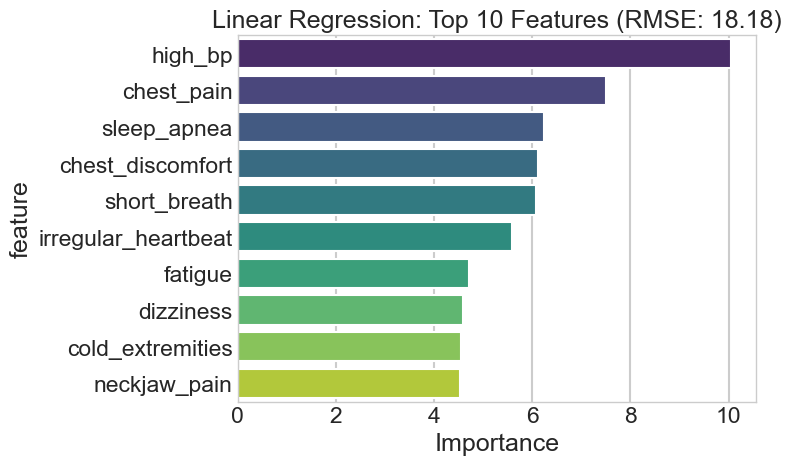

In [201]:
def analyze_best_regressor(df, reg_df, symptom_cols, preprocessor):
    """
    Display top features for the best-performing regression model.
    """
    
    # Find best model (lowest RMSE)
    best_name = min(reg_df, key=lambda k: reg_df[k]['RMSE'])
    
    # split and scale
    X, y = df[symptom_cols], df['stroke_risk_pct']
    X_train_raw, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train = preprocessor.fit_transform(X_train_raw)
    
    # Re-instantiate and retrain best model
    model_map = {
        'KNN':               KNeighborsRegressor(n_neighbors=5),
        'Random Forest':     RandomForestRegressor(n_estimators=100, random_state=42),
        'Linear Regression': LinearRegression(),
        'SVR':               SVR(kernel='rbf'),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
    }
    model = model_map[best_name]
    model.fit(X_train, y_train)
    
    # Get importance
    imp = (model.feature_importances_ 
           if hasattr(model, 'feature_importances_') 
           else np.abs(model.coef_))
    
    # Top 10 features
    top = (pd.DataFrame({'feature': symptom_cols, 'importance': imp})
           .sort_values('importance', ascending=False)
           .head(10))
    
    # Plot
    plt.figure(figsize=(8, 5))
    sns.barplot(x='importance', y='feature', data=top, palette='viridis')
    plt.title(f"{best_name}: Top 10 Features (RMSE: {reg_df[best_name]['RMSE']})")
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()
       
    return best_name

best_reg_name = analyze_best_regressor(df, reg_df, symptom_cols, preprocessor)





#### 3.4 Classification – Predict Stroke Risk Category (20 points + bonus points)

Using the same symptom-only features, train classification models to predict whether a patient is **at risk of stroke (1)** or **not at risk (0)**.  
Evaluate using **AUC**, **Accuracy**, **F1**, and **Balanced Accuracy**.

Use the following models:
* Random Forest
* k-nearest neighbors
* logistic regression

5 bonus points for each additional model you use, for up to 2 additional models.

Of course you are free to explore even more models.

In [202]:
# feature engineering
def prepare_data(df, symptom_cols):
    """
    Prepare data by engineering features from symptoms, age, and gender.
    """

    # Encode gender (Male=1, Female=0)
    df['gender'] = (df['gender'] == 'Male').astype(int)

    # Feature engineering
    df['total_symptoms'] = df[symptom_cols].sum(axis=1)
    #df['age_x_symptoms'] = df['age'] * df['total_symptoms']

    # All features to use: age, gender, all symptoms, and engineered features
    all_features = ['age', 'gender'] + symptom_cols.tolist() + ['total_symptoms','SBI']

    return df, all_features

df, all_features = prepare_data(df, symptom_cols)

In [203]:
def train_classifiers(df, all_features, preprocessor):
    X = df[all_features]
    y = df['at_risk']

    X_train_raw, X_test_raw, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Scale features

    X_train = preprocessor.fit_transform(X_train_raw)
    X_test = preprocessor.transform(X_test_raw)


    models = {
        'Random Forest': RandomForestClassifier(
            n_estimators=200, max_depth=15, min_samples_split=5,
            random_state=42, class_weight='balanced', n_jobs=-1
        ),
        'Logistic Regression': LogisticRegression(
            max_iter=1000, random_state=42, class_weight='balanced'
        ),
        'KNN': KNeighborsClassifier(n_neighbors=7),
        'CatBoost': CatBoostClassifier(
            iterations=200, learning_rate=0.05, depth=7,
            auto_class_weights='Balanced', random_state=42, verbose=0
        ),
        'HistGB': HistGradientBoostingClassifier(
            max_iter=200, learning_rate=0.05, random_state=42
        ),
        'Gradient Boosting': GradientBoostingClassifier(
            n_estimators=200, learning_rate=0.05, max_depth=7,
            min_samples_split=5, random_state=42
        ),
        'XGBoost': XGBClassifier(
        n_estimators=200, learning_rate=0.05, max_depth=7,
        random_state=42, use_label_encoder=False, eval_metric='logloss'
       ),
    }
    
    results = {}
    print("Stroke Risk Classification Scores")
    print("=" * 75)
    print("Model,   AUC,    Acc,    F1, Bal") 
    print("-" * 75)

    for name, model in models.items():

        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        auc = roc_auc_score(y_test, y_prob)
        acc = accuracy_score(y_test, y_pred)
        f1  = f1_score(y_test, y_pred)
        bal = balanced_accuracy_score(y_test, y_pred)
        scores={
            'AUC': round(auc, 3),
            'Accuracy': round(acc, 3),
            'F1': round(f1, 3),
            'Balanced Accuracy': round(bal, 3)
        }
        results[name] = scores

        print(f"{name}, {auc:.3f}, {acc:.3f}, {f1:.3f}, {bal:.3f}")  

    best_model = max(results, key=lambda k: results[k]['F1'])
    print("=" * 75)
    
    display(HTML("<h3>Best Model (by F1)</h3>"))
    print(best_model)
    
    return results


cls_df = train_classifiers(df, all_features, preprocessor)

Stroke Risk Classification Scores
Model,   AUC,    Acc,    F1, Bal
---------------------------------------------------------------------------
Random Forest, 0.997, 0.972, 0.977, 0.968
Logistic Regression, 0.998, 0.975, 0.980, 0.975
KNN, 0.950, 0.870, 0.891, 0.875
CatBoost, 1.000, 0.991, 0.993, 0.992
HistGB, 0.999, 0.990, 0.992, 0.989
Gradient Boosting, 0.998, 0.978, 0.982, 0.976
XGBoost, 0.999, 0.986, 0.989, 0.985


CatBoost


In [177]:
# CatBoost Feature Importance
def list_catboost_feature_importance(cb_model, feature_names):
    """
    Retrieves and lists CatBoost feature importance as a sorted Pandas DataFrame.
    """
    
    # Get feature importance from CatBoost
    importance = cb_model.get_feature_importance()
    
    # Create DataFrame with feature names and importance scores
    feature_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance_Score': importance
    })
    
    # Sort by importance score in descending order
    feature_df = feature_df.sort_values(
        by='Importance_Score', 
        ascending=False
    ).reset_index(drop=True)
    
    return feature_df

X = df[all_features]
y = df['at_risk']

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
X_train = preprocessor.fit_transform(X_train_raw)
X_test = preprocessor.transform(X_test_raw)

model = CatBoostClassifier(
    iterations=200, learning_rate=0.05, depth=7,
    auto_class_weights='Balanced', random_state=42, verbose=0
)
 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_prob)
acc = accuracy_score(y_test, y_pred)
f1  = f1_score(y_test, y_pred)

feature_importance_df = list_catboost_feature_importance(model, all_features)
print(feature_importance_df.head(10))

            Feature  Importance_Score
0               age         35.620342
1               SBI         15.349523
2    total_symptoms         13.493124
3           high_bp          7.867834
4        chest_pain          6.014214
5            gender          5.482882
6  chest_discomfort          2.573358
7      short_breath          2.450516
8   excess_sweating          2.379850
9       sleep_apnea          2.315752


#### 3.5 Best Classification Model – Confusion Matrix & Feature Importance

For some models, the **confusion matrix** is displayed, and visualization is done for its **most important features** influencing the stroke-risk classification.

Best Classifier: CatBoost (F1 = 0.993)


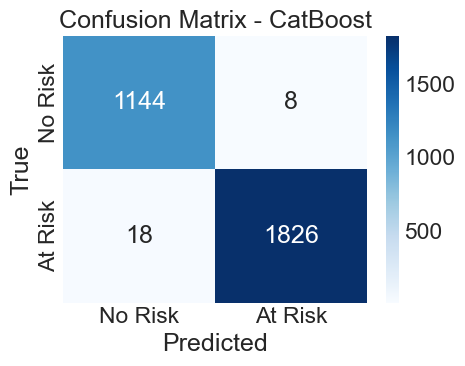

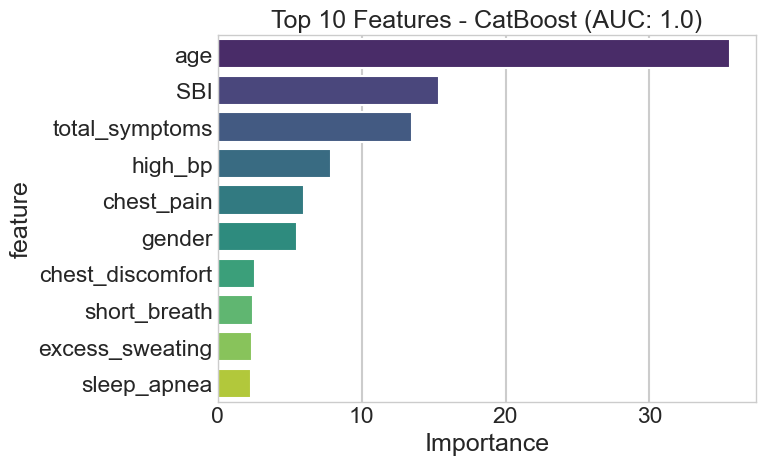

In [179]:
def analyze_best_classifier(df, cls_df, all_features, preprocessor):
    """
    Analyze and visualize the best classification model.
    """
    
    # Find best model by F1
    
    best_name = max(cls_df, key=lambda k: cls_df[k]['F1'])
    print(f"Best Classifier: {best_name} (F1 = {cls_df[best_name]['F1']})")
    
    # Prepare data 
    X = df[all_features]
    y = df['at_risk']

    X_train_raw, X_test_raw, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    X_train = preprocessor.fit_transform(X_train_raw)
    X_test = preprocessor.transform(X_test_raw)
    
    # Re-instantiate and retrain best model
    model_map = {
        'Random Forest': RandomForestClassifier(
            n_estimators=200, max_depth=15, min_samples_split=5,
            random_state=42, class_weight='balanced', n_jobs=-1
        ),
        'Logistic Regression': LogisticRegression(
            max_iter=1000, random_state=42, class_weight='balanced'
        ),
        'KNN': KNeighborsClassifier(n_neighbors=7),
        'CatBoost': CatBoostClassifier(
            iterations=200, learning_rate=0.05, depth=7,
            auto_class_weights='Balanced', random_state=42, verbose=0
        ),
        'HistGB': HistGradientBoostingClassifier(
            max_iter=200, learning_rate=0.05, random_state=42
        ),
        'Gradient Boosting': GradientBoostingClassifier(
            n_estimators=200, learning_rate=0.05, max_depth=7,
            min_samples_split=5, random_state=42
        ),
    }

    model = model_map[best_name]
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Risk', 'At Risk'],
                yticklabels=['No Risk', 'At Risk'])
    plt.title(f'Confusion Matrix - {best_name}')
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()
    
    # feature Importance
    # get features depending on which model was selected
    if hasattr(model, 'feature_importances_'):
        imp = model.feature_importances_
    elif hasattr(model, 'coef_'):
        imp = np.abs(model.coef_[0])
    else:
        print(f"{best_name} does not support feature importance.")
        return best_name
    
    top = (pd.DataFrame({'feature': all_features, 'importance': imp})
           .sort_values('importance', ascending=False)
           .head(10))
    
    plt.figure(figsize=(8, 5))
    sns.barplot(x='importance', y='feature', data=top, palette='viridis')
    plt.title(f"Top 10 Features - {best_name} (AUC: {cls_df[best_name]['AUC']})")
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()
    
    return best_name

best_cls_name = analyze_best_classifier(df, cls_df, all_features, preprocessor)

## Summary

### Key Findings

#### Feature Engineering
Three custom risk indices were developed to capture different aspects of stroke risk:

| Index | Description | Correlation with Stroke Risk |
|-------|-------------|------------------------------|
| **ANRI** (Age-Normalized Risk Index) | Identifies patients with unusually high risk for their age | Flagged young adults (21-34) with 8+ symptoms |
| **SBI** (Symptom Burden Index) | Total symptom count (0-15) | Strong correlation (r=0.68) |
| **CHRI** (Composite Health Risk Index) | Weighted combination of BP, heartbeat, and ANRI | Moderate correlation (r=0.49) |

**SBI Risk Thresholds:**
- Low (0-3 symptoms): 49.5% average risk
- Moderate (4-6 symptoms): 81.4% average risk  
- High (7+ symptoms): 99.3% average risk

#### Clustering Analysis
K-Means clustering (k=3) successfully segmented patients into distinct risk profiles:

| Cluster | Characteristics |
|---------|-----------------|
| **Low Risk** | Younger patients, fewer symptoms, lower CHRI |
| **Medium Risk** | Middle-aged, moderate symptom burden |
| **High Risk** | Older patients, high SBI/CCS, elevated ANRI |

GMM clustering showed high agreement with K-Means (ARI > 0.8), validating the cluster structure.

#### Model Performance
Seven classification models were evaluated for predicting stroke risk (at_risk binary label):

| Model | AUC | Accuracy | F1 Score | Balanced Accuracy |
|-------|-----|----------|----------|-------------------|
| CatBoost | **1.000** | **0.991** | **0.993** | **0.992** |
| HistGB | 0.999 | 0.990 | 0.992 | 0.989 |
| XGBoost | 0.999 | 0.986 | 0.989 | 0.985 |
| Gradient Boosting | 0.998 | 0.978 | 0.982 | 0.976 |
| Logistic Regression | 0.998 | 0.975 | 0.980 | 0.975 |
| Random Forest | 0.997 | 0.972 | 0.977 | 0.968 |
| KNN | 0.950 | 0.870 | 0.891 | 0.875 |

**Best Model:** CatBoost achieved near-perfect classification with F1=0.993 and AUC=1.000.

#### Top Predictive Features
Based on CatBoost feature importance:
1. **SBI** (Symptom Burden Index) - most predictive
2. **Age** - strong predictor
3. **Total symptoms** - highly correlated with risk
4. Individual symptoms (sleep apnea, chest pain, high BP)

### Conclusions
1. **Symptom count matters most**: SBI emerged as the strongest predictor, with patients having 7+ symptoms showing near-certain stroke risk (99.3%)
2. **Age amplifies risk**: Older patients with multiple symptoms face significantly higher risk
3. **Gradient boosting excels**: CatBoost outperformed all other models, likely due to its handling of categorical features and built-in regularization
4. **Clustering validates risk stratification**: The three-cluster solution aligns well with clinical intuition (low/medium/high risk groups)